# RandomLinkSplit() の動作をチェック
`RandomLinkSplit()` の動作を調べるため，人工的なグラフを作り，確認した。

https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.RandomLinkSplit

In [1]:
#################################################
# 一旦，完全グラフを作る
import itertools
import numpy as np
import random

NUM_NODES = 10
node_names = list(range(NUM_NODES))
node_edge_list = [[u,v] for u, v in itertools.combinations(node_names, 2)]

# 完全グラフでは RandomLinkSplit() できないため，エッジの 20% を消す
node_edge_list = random.sample(node_edge_list, int(len(node_edge_list)*0.8))

# PyTorch Geometry の edge_index の形式に合うよう，転置
node_edge_list = np.array(node_edge_list).T
print(node_edge_list)

#################################################
# ここから PyG データを作る
import torch
from torch_geometric.data import Data

# ノード ＆ エッジ
edge_index = torch.tensor(node_edge_list, dtype=torch.long)

# ノードの特徴量 (RandomLinkSplit のためには値は適当でよい)
x = torch.tensor([[1,2]] * NUM_NODES, dtype=torch.float)
 
# ラベル (RandomLinkSplit のためには値は適当でよい)
y = torch.tensor([1]*NUM_NODES, dtype=torch.float)
 
data = Data(x=x, y=y, edge_index=edge_index)

[[5 3 0 3 0 2 4 1 0 1 5 2 1 1 4 0 4 2 2 7 2 0 5 3 6 0 4 1 2 1 3 1 4 8 7 6]
 [8 9 2 5 5 6 8 5 6 3 9 4 2 7 6 3 7 3 5 8 7 4 7 6 7 1 5 8 8 9 8 4 9 9 9 9]]


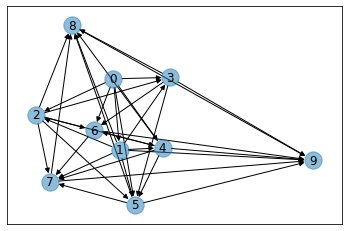

In [2]:
from torch_geometric.utils import to_networkx
import networkx as nx

def draw_network(g):
    pos = nx.spring_layout(g, seed=0)
    nx.draw_networkx_nodes(g, pos, alpha=0.5) # alpha=0.5 はラベルを目立たせるため
    nx.draw_networkx_edges(g, pos) #, arrowstyle='-', alpha=0.2)
    nx.draw_networkx_labels(g, pos) #, font_size=10)

g = to_networkx(data)
draw_network(g)

In [3]:
# RandomLinkSplit によるリンクの分割
from torch_geometric.transforms import RandomLinkSplit
transform = RandomLinkSplit(num_val=0.1, num_test=0.2, is_undirected=True)
train_data, val_data, test_data = transform(data)

`RandomLinkSplit()` の結果，`edge_label_index` に示されるように `train_data`, `val_data`, `test_data` のエッジ数がそれぞれ 52本，6本，14本となっている。（乱数でやっているから，実行のたびにエッジ数は若干，変動する）

In [4]:
train_data

Data(x=[10, 2], edge_index=[2, 52], y=[10], edge_label=[52], edge_label_index=[2, 52])

In [5]:
val_data

Data(x=[10, 2], edge_index=[2, 52], y=[10], edge_label=[6], edge_label_index=[2, 6])

In [6]:
test_data

Data(x=[10, 2], edge_index=[2, 58], y=[10], edge_label=[14], edge_label_index=[2, 14])

In [7]:
print(train_data.edge_label_index)
print(val_data.edge_label_index)
print(test_data.edge_label_index)

tensor([[0, 2, 3, 1, 1, 5, 7, 3, 8, 3, 0, 2, 4, 4, 7, 1, 6, 4, 4, 4, 0, 3, 0, 1,
         2, 6, 3, 9, 5, 6, 9, 4, 5, 6, 8, 9, 6, 7, 8, 2, 5, 7, 5, 6, 3, 8, 7, 4,
         7, 7, 6, 8],
        [6, 8, 9, 9, 5, 8, 8, 6, 9, 8, 1, 6, 8, 9, 9, 3, 9, 6, 5, 7, 4, 5, 3, 7,
         3, 7, 2, 1, 4, 3, 7, 0, 6, 8, 7, 2, 4, 1, 1, 9, 3, 5, 2, 5, 1, 5, 2, 1,
         4, 3, 0, 0]])
tensor([[2, 0, 1, 0, 3, 5],
        [5, 5, 8, 8, 7, 1]])
tensor([[2, 1, 0, 2, 1, 5, 5, 4, 1, 6, 2, 0, 9, 3],
        [7, 2, 2, 4, 4, 7, 9, 3, 6, 2, 0, 9, 0, 4]])


試しに `train_data`, `val_data`, `test_data` を可視化すると以下のようになる。

いまいち解釈できない。

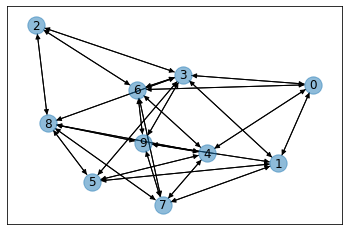

In [8]:
g = to_networkx(train_data)
draw_network(g)

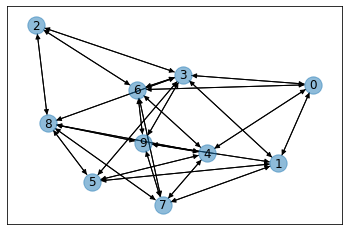

In [9]:
g = to_networkx(val_data)
draw_network(g)

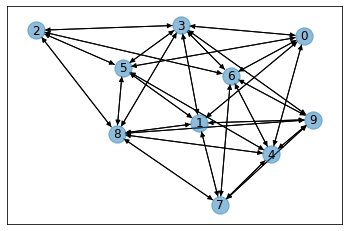

In [10]:
g = to_networkx(test_data)
draw_network(g)